In [1]:

# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
from numpy.linalg import inv
import random
import os

In [2]:

#take image

test_data = np.ndarray(shape=(512,512,4), dtype=np.integer)

for i in range(4):
    img = plt.imread( str(i+1)+'.gif')
    # copying images to the training array
    test_data[:,:,i] = np.array(img[:,:,0])


In [3]:

#data points
sp_x_r = [159,158,153,154,163,167,171,217,160,213,173,163,185,216,159,162,186,170,
          150,159,186,211,164,218,228,156,179,151,173,145,185,186,181,213,159,208,
          158,191,224,218,178,170,183,171,218,214,218,151,158,225]

sp_y_r = [6,38,16,7,30,129,166,292,32,287,127,159,254,286,156,156,233,461,
          12,45,229,347,47,324,322,16,120,6,457,19,233,232,228,282,18,292,
          20,247,314,344,120,34,233,128,351,287,280,7,9,313]

sp_x_nr = [230,216,489,311,120,137,417,302,89,427,369,88,79,476,70,316,48,394,
           32,448,416,360,287,91,31,293,92,418,68,344,428,55,294,53,380,371,
           486,238,446,131,125,308,312,311,275,359,132,210,457,246,299,360,421,493,
           236,375,392,48,478,254,427,57,445,448,50,404,392,424,451,379,359,269,
           147,412,236,337,232,362,479,475,306,91,462,275,468,102,306,237,338,405,
           264,410,220,106,389,110,247,391,63,433]

sp_y_nr = [83,214,163,85,402,430,307,49,436,425,244,374,227,43,296,70,118,366,
           411,215,113,333,24,235,383,109,402,444,261,420,245,438,149,416,245,66,
           18,55,411,226,271,100,336,208,253,444,387,123,340,108,334,365,375,445,
           158,355,377,233,75,441,103,404,308,313,96,83,49,173,185,406,458,460,
           253,464,98,478,471,327,240,489,239,425,452,65,173,441,478,149,475,90,
           289,198,150,168,147,95,457,93,414,197]
#mean

# mean of river class
T1=[0,0,0,0]
a=np.ndarray(shape=(50,4))
for i in range(50):
    for j in range(4):
        T1[j] = T1[j] + test_data[sp_x_r[i],sp_y_r[i],j]
    
for i in range(4):
    T1[i] = T1[i]/50

for i in range(50):
    a[i] = np.subtract(test_data[sp_x_r[i],sp_y_r[i],:],T1)

print(a.shape)


# mean of non-river class
T2=[0,0,0,0]
b=np.ndarray(shape=(100,4), dtype=np.float64)

for i in range(50):
    for j in range(4):
        T2[j] = T2[j] + test_data[sp_x_nr[i],sp_y_nr[i],j]
    
for i in range(4):
    T2[i] = T2[i]/100

for i in range(100):
    b[i] = np.subtract(test_data[sp_x_nr[i],sp_y_nr[i],:],T2)

print(b.shape)


(50, 4)
(100, 4)


In [4]:

# covariance matrices

cov_r = np.ndarray(shape=(4, 4), dtype=np.float64)
cov_nr = np.ndarray(shape=(4, 4), dtype=np.float64)

for i in range(4):
    for j in range(4):
        cov_r[i][j]=np.dot(a[:,i],a[:,j])/50
        
print('Covariance of River class')
print(cov_r)

for i in range(4):
    for j in range(4):
        cov_nr[i][j]=np.dot(b[:,i],b[:,j])/100
print('\nCovariance of Non-river class')
print(cov_nr)

inverse_cov_r = inv(cov_r)
inverse_cov_nr = inv(cov_nr)



Covariance of River class
[[ 4.3364  4.1016  5.9504 -1.7028]
 [ 4.1016  4.9104  6.8576 -0.6232]
 [ 5.9504  6.8576 15.5344  2.5592]
 [-1.7028 -0.6232  2.5592 34.3556]]

Covariance of Non-river class
[[428.9365 274.1024 287.411  342.1848]
 [274.1024 176.514  185.2758 220.6846]
 [287.411  185.2758 199.5955 229.6561]
 [342.1848 220.6846 229.6561 307.1759]]


In [5]:


def cal(i,j):
    r = np.subtract(test_data[i,j,:],T1)
    nr = np.subtract(test_data[i,j,:],T2)

    river_class = np.dot(np.dot(r.T,inverse_cov_r), r)
    non_river_class = np.dot(np.dot(nr.T,inverse_cov_nr), nr)
    
    # density functions

    det_cov_r = np.linalg.det(cov_r)
    p1 = (-0.5) * 1/np.sqrt(det_cov_r) * np.exp(river_class);

    det_cov_nr = np.linalg.det(cov_nr)
    p2 = (-0.5) * 1/np.sqrt(det_cov_nr) * np.exp(non_river_class);
    return p1,p2


def bayes(P1, P2):
    out_image=np.ndarray(shape=(512, 512), dtype = np.integer)
    for i in range(512):
        for j in range(512):
            p1,p2 = cal(i,j)
            if((P1 * p1) >= (P2 * p2)):
                out_image[i,j]=255
            else:
                out_image[i,j]=0
                
    return out_image



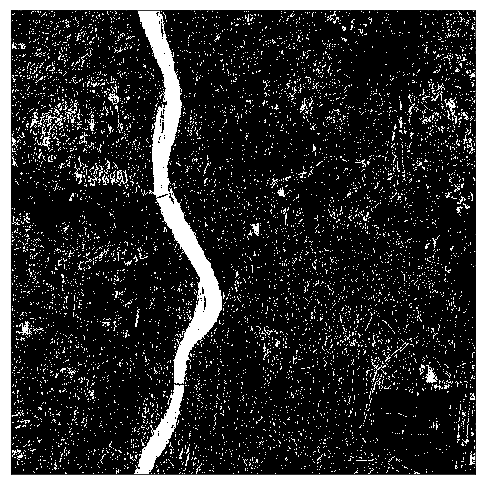

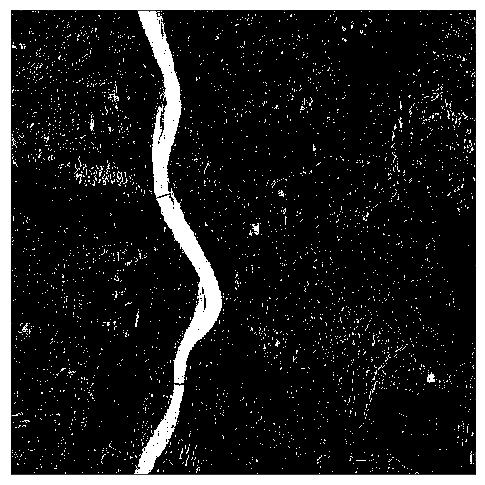

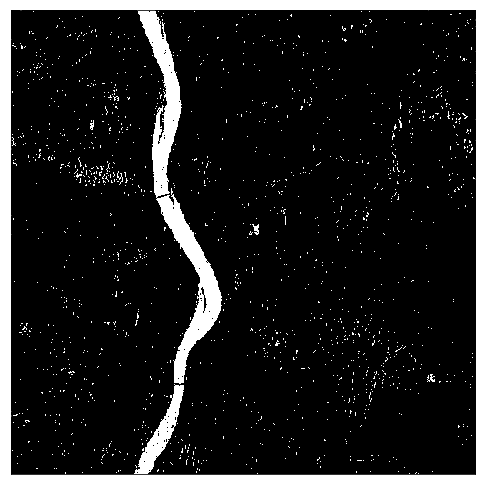

In [6]:

out_image1 = bayes(P1=0.3,P2=0.7)


plt.subplot(1,1,1)
plt.imshow(out_image1, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()


out_image2 = bayes(P1=0.5,P2=0.5)


plt.subplot(1,1,1)
plt.imshow(out_image2, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()



out_image3 = bayes(P1=0.7,P2=0.3)


plt.subplot(1,1,1)
plt.imshow(out_image3, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

